<a href="https://colab.research.google.com/github/StefanHubner/MachineLearningEconomics/blob/main/CAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
suppressPackageStartupMessages({ library(tidyverse) })

path <- "https://raw.githubusercontent.com/StefanHubner/MachineLearningEconomics/main/data/stocks/returns.csv"
returns <- read_csv(path, show_col_types = FALSE)

options(repr.plot.width = 30, repr.plot.height = 12)

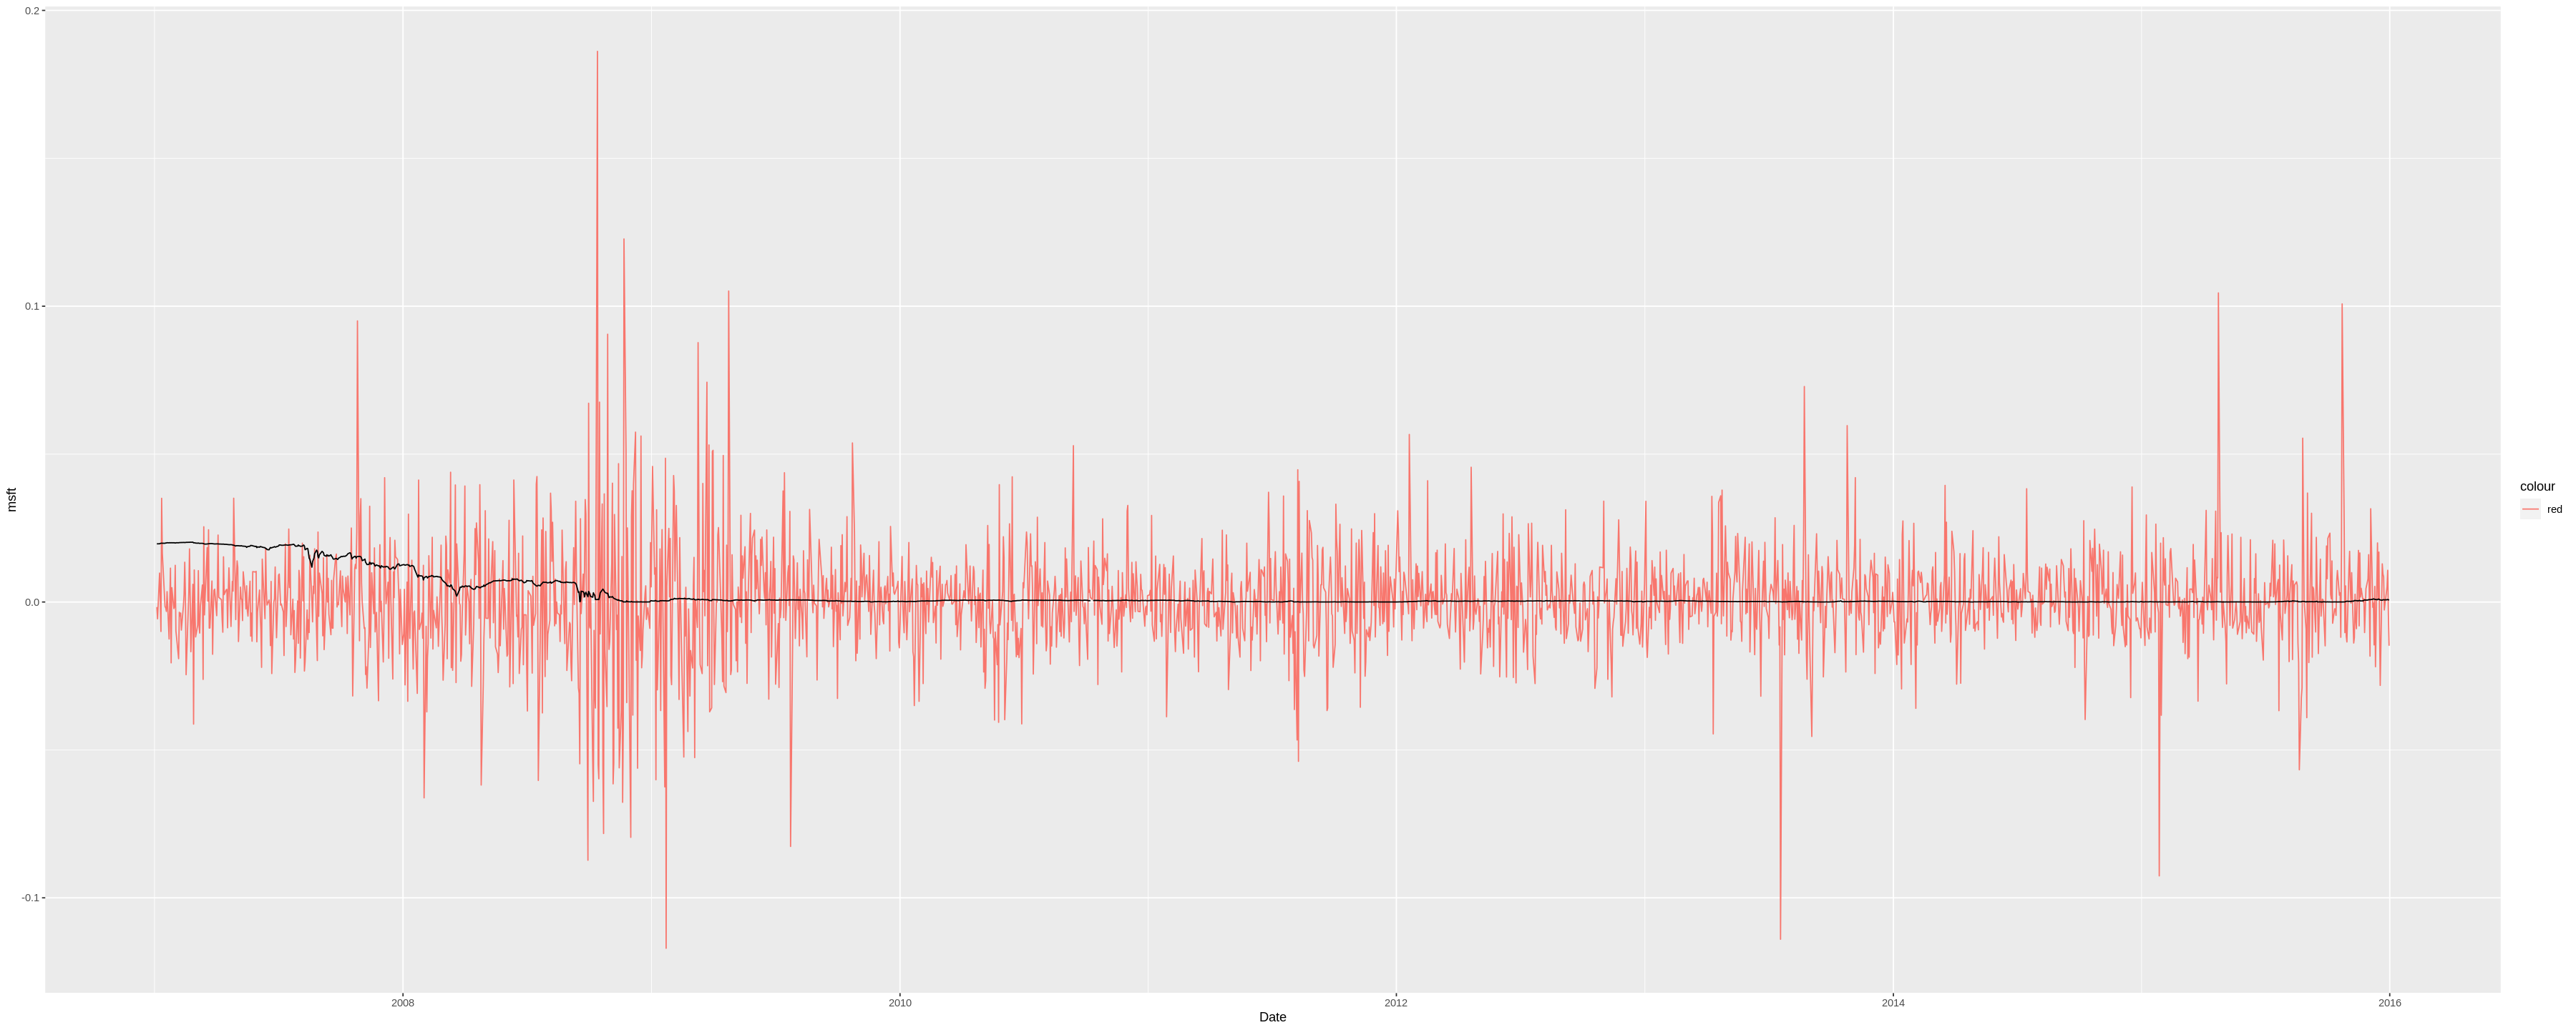

In [4]:
ggplot(returns) +
   geom_line(aes(x = Date, y = msft, color = "red")) +
   geom_line(aes(x = Date, y = Rf))

In [5]:
# tilde indicates a formula, . is a placeholder for the matched variables in the across fct

build_er <- function(from, to) {
  er <- function(offset) {
    excess <- returns %>%
      mutate(across(-Date, ~ . - Rf)) %>%
      filter(Date >= (as.Date(from) + offset) & Date <= (as.Date(to) + offset)) %>%
      select(-Rf, -Date) %>%
      drop_na()
    list(train = excess[-nrow(excess),], test = excess[nrow(excess),])
  }
  er
}

In [6]:
todaily <- function(r) exp(log(1 + r) / 252) - 1
toyearly <- function(mu) (1 + mu)^252 - 1

In [7]:
mv <- function(r) {
  # targeted daily returns
  R <- todaily(r)

  data <- build_er("2014-01-01", "2015-12-31")(0)
  mu <- colMeans(as.matrix(data$train))
  sigma <- cov(as.matrix(data$train))

  # optimal portfolio weights
  sinv <- solve(sigma)
  iota <- rep(1, length(mu))
  a <- (mu %*% sinv %*% mu)[1]
  b <- (mu %*% sinv %*% iota)[1]
  d <- (iota %*% sinv %*% iota)[1]
  det <- a*d - b^2
  lambda <- (d*R - b)/det
  nu <- (-b*R + a)/det
  x <- sinv %*% (lambda * mu + nu * iota)

  # expected daily returns and daily volatility (s.d.) of portfolio
  r_p <- (t(x) %*% as.numeric(data$test))[1]
  mu_p <- (t(x) %*% mu)[1]
  sigma_p <- sqrt((d*R^2 - 2*b*R + a)/det)

  list(ins = c(mu_p, sigma_p),
        oos = c(r_p),
        weights = t(x))
}

mv(0.05)

a,aa,aaba,aapl,abc,abt,abx,adbe,adi,adm,⋯,xel,xl,xlnx,xom,xoma,xray,xrx,yum,zbh,zion
-0.07650108,-0.01763457,0.01479161,-0.0003225711,0.06256097,0.01351381,-0.001978723,-0.005799289,-0.004024199,0.02874571,⋯,0.1253898,-0.008396374,0.03171178,0.04568571,-0.003354046,-0.03767862,-0.03199574,-0.01393733,0.01877224,-0.04992101


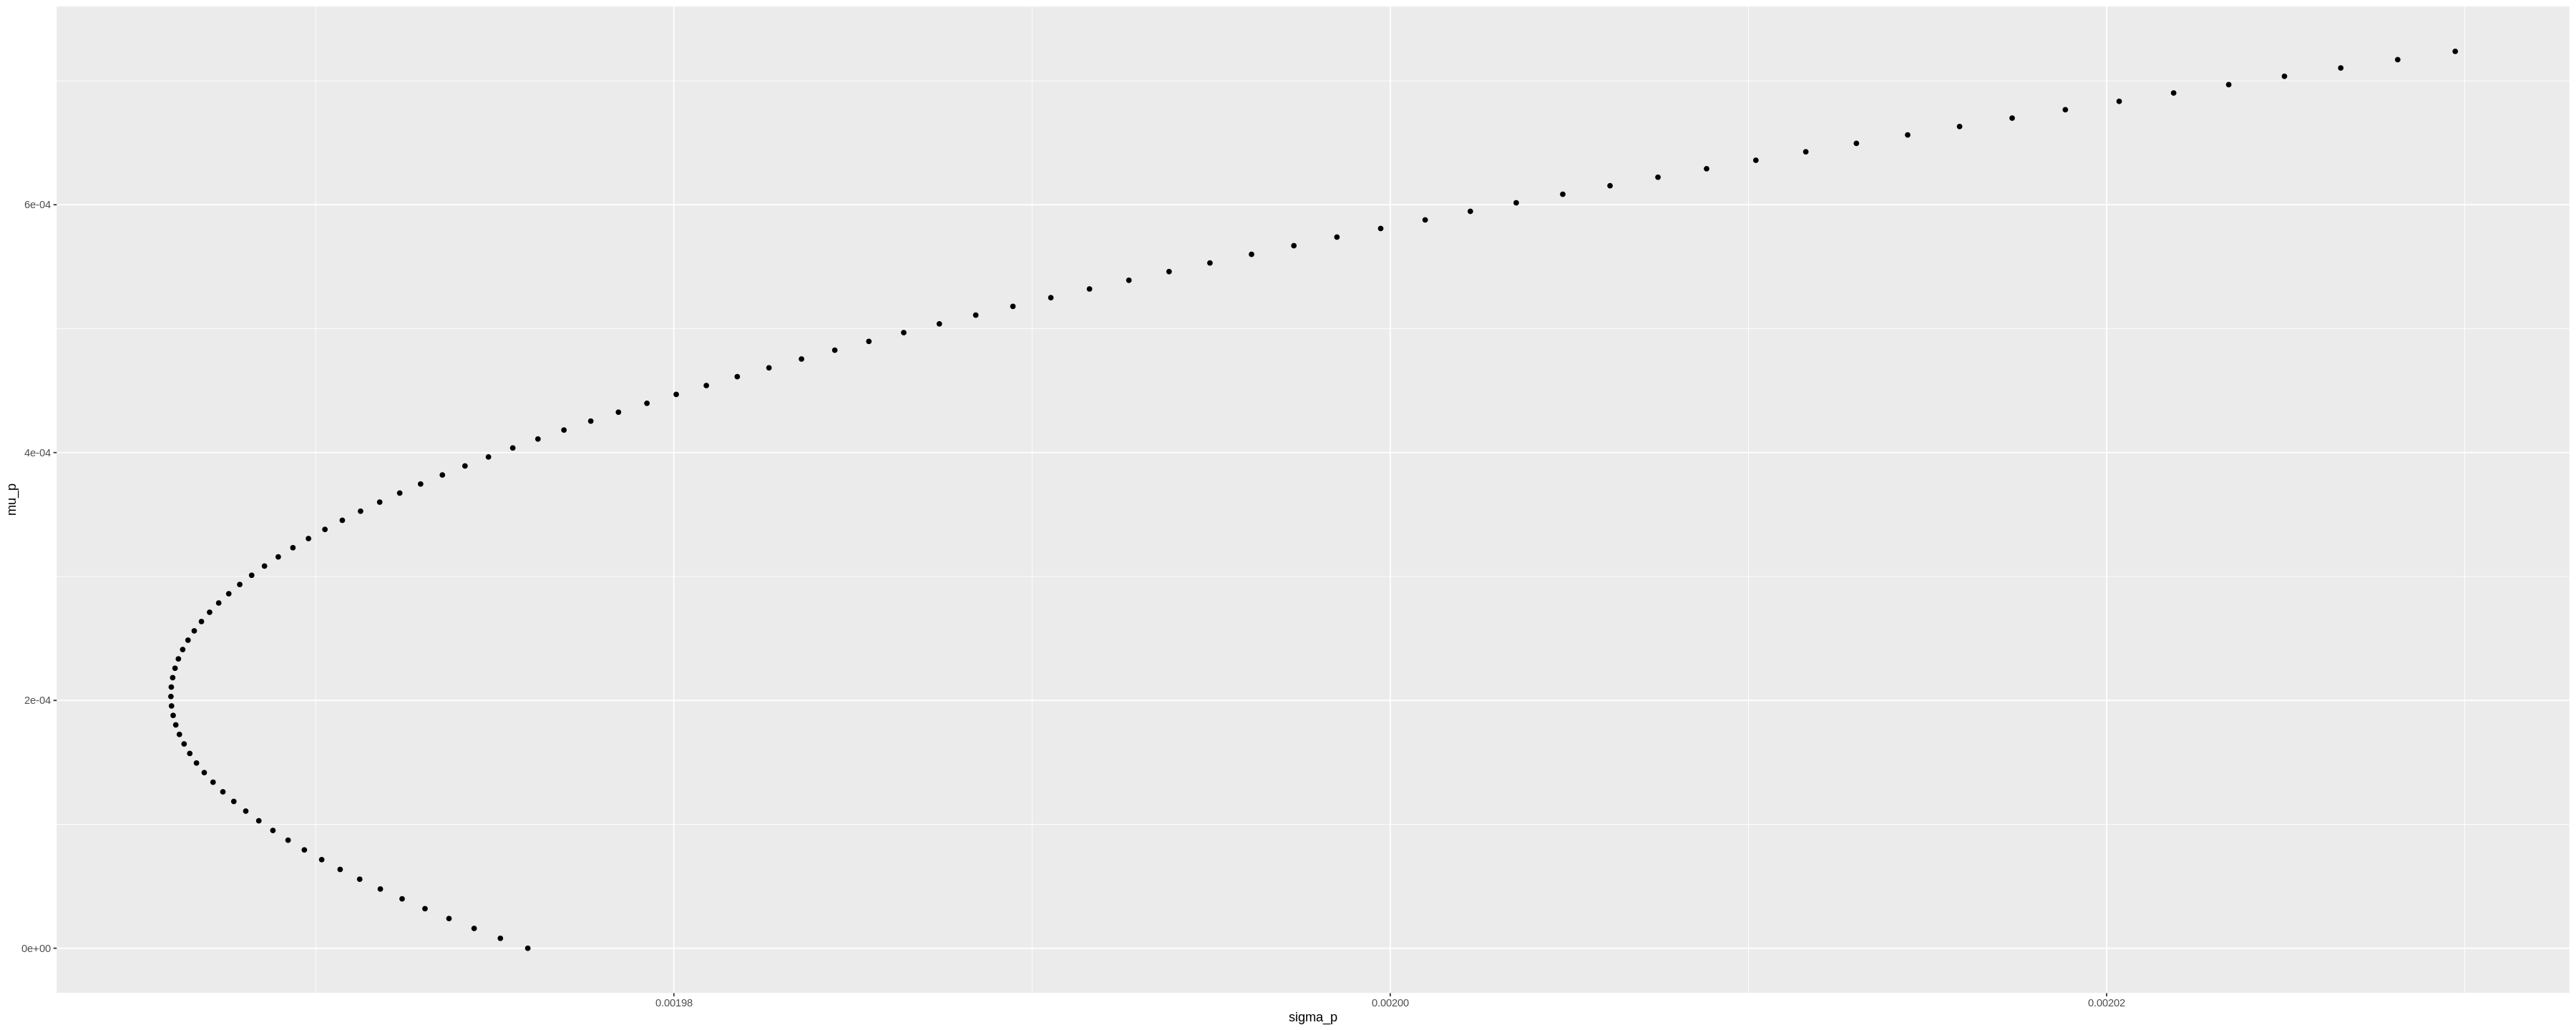

In [9]:
mu_p <- seq(0, 0.2, length.out = 100)
frontier.ins <- data.frame(t(sapply(FUN = function(r) mv(r)$ins, mu_p)))
names(frontier.ins) <- c("mu_p", "sigma_p")

ggplot(frontier.ins, aes(x = sigma_p, y = mu_p)) +
  geom_point()

In [12]:
system("sudo apt-get install libgmp-dev libmpfr-dev")

In [15]:
install.packages("CVXR", dependencies = TRUE)
suppressPackageStartupMessages({ library(CVXR, quietly = TRUE) })

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘gmp’, ‘Rmpfr’, ‘ECOSolveR’, ‘scs’, ‘osqp’, ‘RcppEigen’, ‘nnls’, ‘slam’




In [36]:
mv_lasso <- function(lambda, offset, r) {
  data <- build_er("2014-01-01", "2015-03-31")(offset)

  mu <- colMeans(as.matrix(data$train))
  sigma <- cov(as.matrix(data$train))

  n <- length(mu)
  R <- todaily(r)
  iota_n <- rep(1, n)

  # Define Variables
  x <- Variable(n)

  # Define Objective
  objective <- Minimize(quad_form(x, sigma) + lambda * sum(abs(x)))

  # Define Constraints
  constraints <- list(t(mu) %*% x == R,
                      t(iota_n) %*% x == 1)

  # Formulate Problem
  problem <- Problem(objective, constraints)

  # Solve Problem
  solution <- solve(problem)

  # Extract Portfolio Weights
  x_value <- solution$getValue(x)

  nonzero <- names(data$train)[which(x_value > 10e-10)]

  r_p <- t(x_value) %*% as.numeric(data$test)
  mu_p <- t(x_value) %*% mu
  sigma_p <- sqrt(t(x_value) %*% sigma %*% x_value)

  list( ins = c(mu_p, sigma_p),
        oos = c(r_p),
        weights = t(x_value),
        selected = nonzero)
}

In [38]:
mv_lasso(0.000001, 0, 0.05)

-0.003771803,0.0006706156,-0.0006736505,0.01322677,0.04187068,2.999755e-07,0.02680792,4.817153e-07,-0.001336051,0.01427752,⋯,-1.088518e-06,0.06069821,0.01081857,8.335236e-07,8.987408e-06,4.227945e-07,-0.01374068,-0.03943413,9.002593e-07,-4.902568e-07


In [11]:
# Define grids
grid_lambda <- c(0, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000)
grid_offset <- seq(1, 270, by = 1)
grid_r <- seq(0.0, 0.2, by = 0.01)

# Generate Cartesian product of grids
grid_combinations <- expand.grid(lambda = grid_lambda, offset = grid_offset, r = grid_r)

results_pmap <- pmap(grid_combinations, mv_lasso) %>%
  map_dbl(~ .[["oos"]])

# Create a tibble from grid_combinations and add oos values from results_pmap
results_tibble <- bind_cols(grid_combinations, oos = results_pmap)

# Use pipe to calculate mean and standard deviation for each (lambda, r) pair
agg_results <- results_tibble %>%
  group_by(lambda, r) %>%
  summarise(
    mean_oos = mean(oos),
    median_oos = median(oos),
    sd_oos = sd(oos)
  )

`summarise()` has grouped output by 'lambda'. You can override using the
`.groups` argument.


In [ ]:
# Display and save aggregated results
print(agg_results)
saveRDS(agg_results, "agg_res_270.rds")

In [10]:
path <- "https://github.com/StefanHubner/MachineLearningEconomics/raw/main/data/stocks/agg_res_270.rds"
agg_results <- readRDS(url(path))

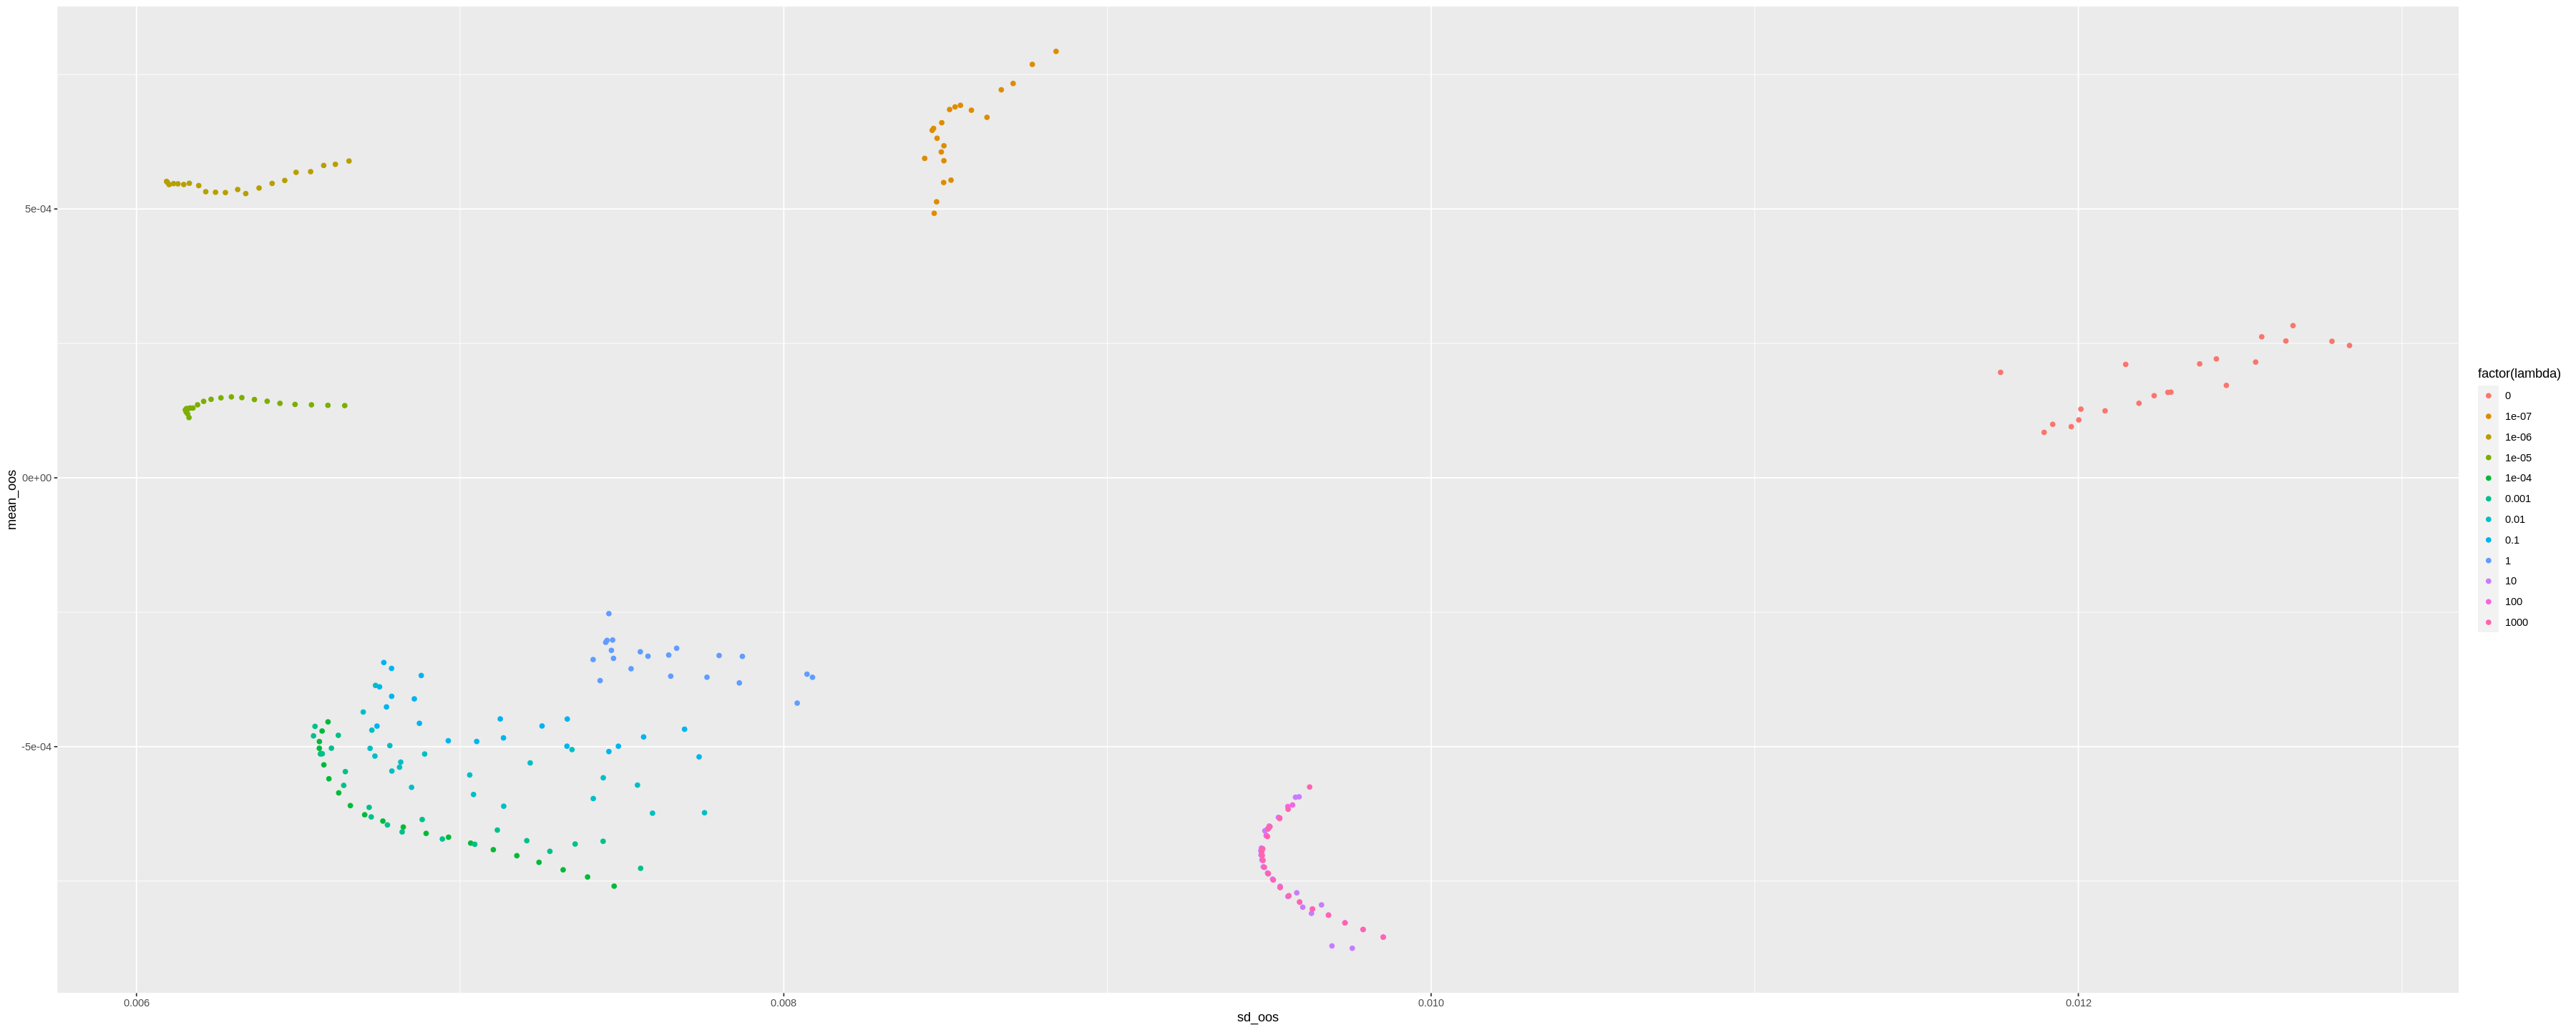

In [11]:
ggplot(agg_results, aes(x = sd_oos, y = mean_oos, group = factor(lambda), color = factor(lambda))) +
  geom_point()

In [39]:
length(mv_lasso(0.000001, 0, 0.10)$selected)

[1] 126